In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, stats

#### Loading Cleaned Data
We begin by loading our cleaned dataset and selecting only the relevant columns for this analysis: style and final_place.

In [2]:
# Load your dataset
df = pd.read_csv('Data/finalists_cleaned.csv')

In [4]:
df = df[['style', 'final_place']].dropna()

#### Quick Peek at the Data

In [5]:
# Show first few rows
print("Sample data:")
print(df.head())

Sample data:
    style  final_place
0     Pop          5.0
1     Pop         24.0
2     Pop         23.0
3     Pop         13.0
4  Ballad         20.0


In [6]:
df.describe

<bound method NDFrame.describe of       style  final_place
0       Pop          5.0
1       Pop         24.0
2       Pop         23.0
3       Pop         13.0
4    Ballad         20.0
..      ...          ...
353  Ballad          8.0
354  Ballad         11.0
355     Pop         20.0
356  Ballad          5.0
357   Dance         24.0

[358 rows x 2 columns]>

#### Explore Style Distribution
Check how many entries belong to each style. This helps us understand if some styles are overrepresented.

In [7]:
df['style'].value_counts()

style
Pop            163
Ballad          98
Dance           38
Traditional     29
Rock            27
Opera            3
Name: count, dtype: int64

We also prepare a version of the style column that includes the count for easier interpretation in plots:

In [8]:
style_counts = df['style'].value_counts()

In [9]:
#Add a column that are used for visualization
df['style_with_count'] = df['style'].apply(lambda x: f"{x} (n={style_counts[x]})")

####  Define Winning Entries
Add a column to flag whether a participant won (i.e., finished in first place).

In [10]:
# Add a column for winners
df['is_winner'] = (df['final_place'] == 1).astype(int)

In [50]:
# Calculate win rate per genre
win_rates = df.groupby('style')['is_winner'].mean().sort_values(ascending=False)
win_rates

style
Traditional    0.068966
Ballad         0.040816
Rock           0.037037
Pop            0.036810
Dance          0.026316
Opera          0.000000
Name: is_winner, dtype: float64

Convert the result into a clean DataFrame:

In [13]:
win_rates_df = win_rates.reset_index()  # This creates a DataFrame with two columns
win_rates_df.columns = ['Style', 'Win Rate']  # Rename those two columns properly

#### Statistical Analysis: ANOVA Test
We use one-way ANOVA to test whether there are statistically significant differences in final placement across styles.

In [14]:
grouped = [group['final_place'].values for _, group in df.groupby('style')]

In [15]:
# Perform ANOVA test
f_stat, p_val = f_oneway(*grouped)

In [16]:
print("\n=== ANOVA Test Results ===")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_val:.4f}")


=== ANOVA Test Results ===
F-statistic: 0.94
p-value: 0.4528


In [17]:
# Interpret the p-value
if p_val < 0.05:
    print("✅ There is a statistically significant difference in final placement between styles.")
else:
    print("❌ No statistically significant difference found between styles.")

❌ No statistically significant difference found between styles.


#### Visualization: Final Placement by Style
A boxplot helps visualize the distribution of placements per style, including medians, quartiles, and outliers.

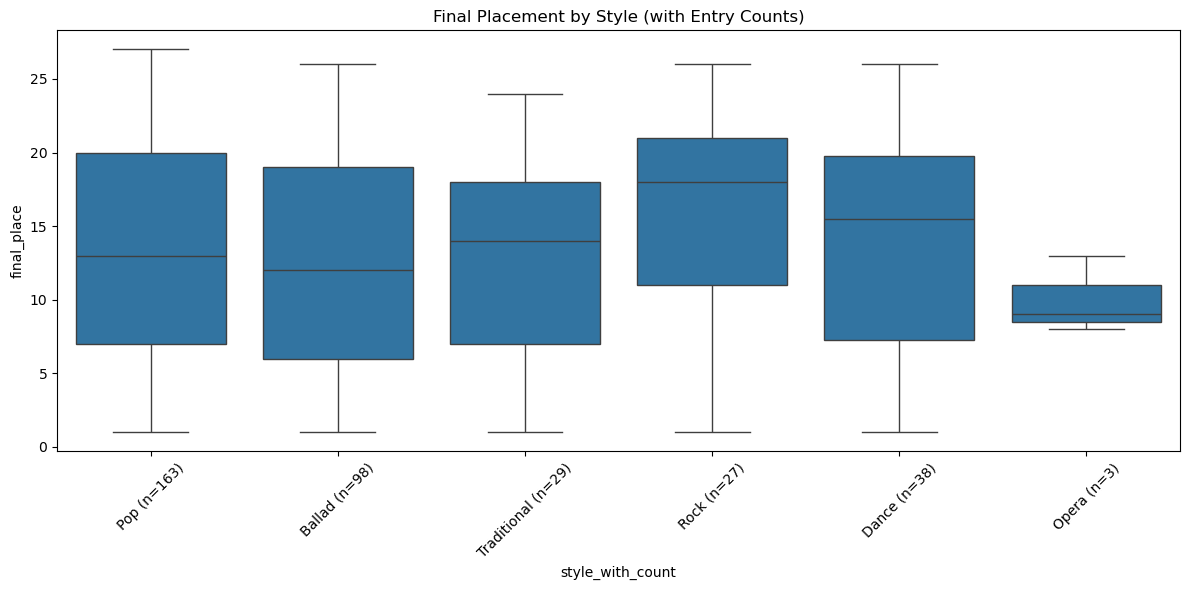

In [18]:
# Visualize: Boxplot of final_place grouped by style
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='style_with_count', y='final_place')
plt.title("Final Placement by Style (with Entry Counts)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Visualization: Win Rates by Style
We now visualize the percentage of winners in each style using a bar chart.

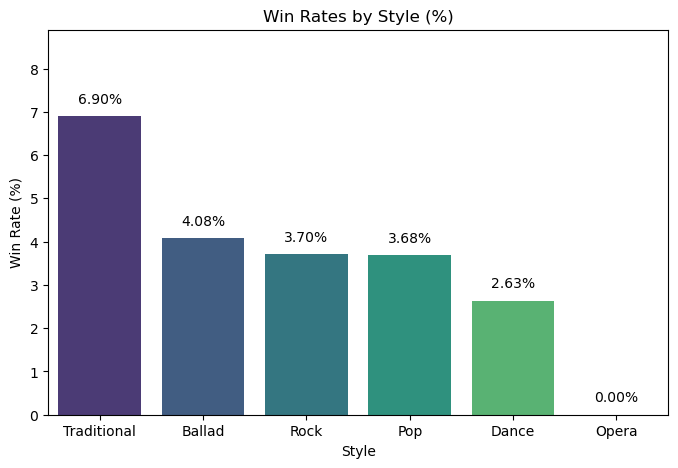

In [19]:
# Convert win rates to percentage
win_rates_df['Win Rate'] = win_rates_df['Win Rate'] * 100

plt.figure(figsize=(8,5))
sns.barplot(data=win_rates_df, x='Style', y='Win Rate', hue='Style', palette='viridis', legend=False)
plt.title('Win Rates by Style (%)')
plt.ylabel('Win Rate (%)')
plt.xlabel('Style')
plt.ylim(0, win_rates_df['Win Rate'].max() + 2)  # little padding on top

# Add percentage labels on top of the bars
for i, rate in enumerate(win_rates_df['Win Rate']):
    plt.text(i, rate + 0.3, f"{rate:.2f}%", ha='center')

plt.show()
